In [8]:
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from math import sqrt

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
#import graphviz

%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
import scipy.stats as stats

import statsmodels.api as sm
from datetime import date, datetime, time

Matplotlib is building the font cache; this may take a moment.


In [97]:
df=pd.read_csv("C:\\Users\\admin\\Desktop\\python_ml_dataset.csv")

In [4]:
df.head()

,booking_time,booking_distance,booking_amount,actual_total_time,payment_method_name,item_total_cnt,item_unique_cnt,customer_id,merchant_id
0,2020-09-30 22:06:22.020381,4.06,11000,1551,pay2,1,1,63,31
1,2020-09-05 22:03:06.918260,1.83,10000,2086,pay2,2,1,243,42
2,2020-10-15 00:06:38.545723,1.85,6000,1760,pay4,3,3,344,12
3,2020-10-27 19:52:40.941202,2.25,9000,1235,pay1,2,2,224,45
4,2020-10-11 08:22:12.606707,0.45,5000,1604,pay1,1,1,233,22


In [5]:
df.describe()

,booking_distance,booking_amount,actual_total_time,item_total_cnt,item_unique_cnt,customer_id,merchant_id
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,3.065560,6944.256000,1520.756100,2.644510,1.869430,249.230890,24.42082
std,2.217313,5335.444037,782.001058,2.504719,1.160463,144.438067,14.41342
min,0.010000,0.000000,170.000000,1.000000,1.000000,0.000000,0.00000
25%,1.480000,5000.000000,1031.000000,1.000000,1.000000,125.000000,12.00000
50%,2.590000,6000.000000,1383.000000,2.000000,2.000000,249.000000,24.00000
75%,4.070000,10000.000000,1846.000000,3.000000,2.000000,374.000000,37.00000
max,24.720000,69000.000000,76994.000000,115.000000,23.000000,499.000000,49.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   booking_time         100000 non-null  object 
 1   booking_distance     100000 non-null  float64
 2   booking_amount       100000 non-null  int64  
 3   actual_total_time    100000 non-null  int64  
 4   payment_method_name  100000 non-null  object 
 5   item_total_cnt       100000 non-null  int64  
 6   item_unique_cnt      100000 non-null  int64  
 7   customer_id          100000 non-null  int64  
 8   merchant_id          100000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 6.9+ MB


In [26]:
df['customer_id'].unique()
df['merchant_id'].unique()

array([31, 42, 12, 45, 22,  7, 33, 15,  9, 27, 11, 37, 41, 38, 23, 25,  0,
       10, 18, 30, 21, 32,  4, 34, 20, 47, 49,  1, 40, 16, 13, 26, 44,  8,
       39, 28,  2, 46, 36,  3, 43,  5, 29, 48, 19, 17, 14,  6, 35, 24],
      dtype=int64)

## Checking the null values

In [34]:
df.isnull().sum()

booking_time           0
booking_distance       0
booking_amount         0
actual_total_time      0
payment_method_name    0
item_total_cnt         0
item_unique_cnt        0
customer_id            0
merchant_id            0
book_DOW               0
book_m                 0
dtype: int64

In [27]:
df.head()

,booking_time,booking_distance,booking_amount,actual_total_time,payment_method_name,item_total_cnt,item_unique_cnt,customer_id,merchant_id
0,2020-09-30 22:06:22.020381,4.06,11000,1551,pay2,1,1,63,31
1,2020-09-05 22:03:06.918260,1.83,10000,2086,pay2,2,1,243,42
2,2020-10-15 00:06:38.545723,1.85,6000,1760,pay4,3,3,344,12
3,2020-10-27 19:52:40.941202,2.25,9000,1235,pay1,2,2,224,45
4,2020-10-11 08:22:12.606707,0.45,5000,1604,pay1,1,1,233,22


## Adding new features like day of week and month

In [98]:
df['booking_time']=pd.to_datetime(df['booking_time'])
df['book_DOW'] = df['booking_time'].dt.dayofweek
df['book_m'] = df['booking_time'].dt.month
df['book_hr'] = df['booking_time'].dt.hour

In [33]:
df.head()

,booking_time,booking_distance,booking_amount,actual_total_time,payment_method_name,item_total_cnt,item_unique_cnt,customer_id,merchant_id,book_DOW,book_m
0,2020-09-30 22:06:22.020381,4.06,11000,1551,pay2,1,1,63,31,2,9
1,2020-09-05 22:03:06.918260,1.83,10000,2086,pay2,2,1,243,42,5,9
2,2020-10-15 00:06:38.545723,1.85,6000,1760,pay4,3,3,344,12,3,10
3,2020-10-27 19:52:40.941202,2.25,9000,1235,pay1,2,2,224,45,1,10
4,2020-10-11 08:22:12.606707,0.45,5000,1604,pay1,1,1,233,22,6,10


In [51]:
## Visualising

df2=df["book_DOW"].value_counts().to_frame().reset_index()
df2.columns=["book_DOW","count"]

In [52]:
df2

,book_DOW,count
0,3,14848
1,2,14573
2,1,14538
3,0,14250
4,5,14223
5,6,14128
6,4,13440


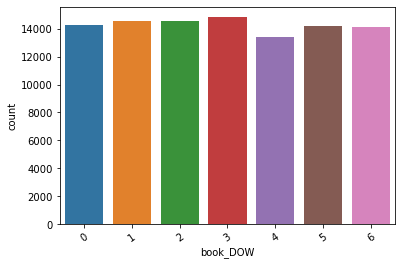

In [63]:
sns.barplot(df2['book_DOW'],df2["count"])
plt.xticks(rotation=35)
plt.show()

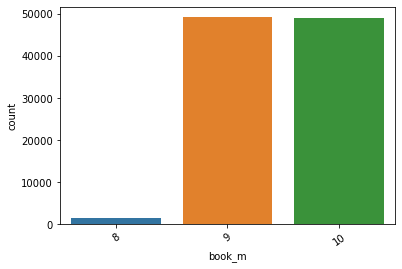

In [61]:
df3=df["book_m"].value_counts().to_frame().reset_index()
df3.columns=["book_m","count"]
sns.barplot(df3['book_m'],df3["count"])
plt.xticks(rotation=35)
plt.show()

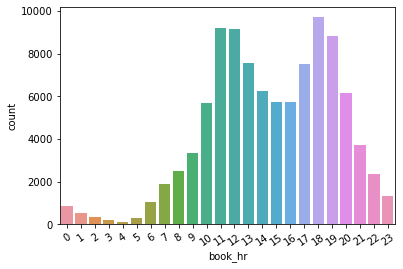

In [60]:
df3=df["book_hr"].value_counts().to_frame().reset_index()
df3.columns=["book_hr","count"]
plt.figure(2)
sns.barplot(df3['book_hr'],df3["count"])
plt.xticks(rotation=35)
plt.show()

In [64]:
df.head()

,booking_time,booking_distance,booking_amount,actual_total_time,payment_method_name,item_total_cnt,item_unique_cnt,customer_id,merchant_id,book_DOW,book_m,book_hr
0,2020-09-30 22:06:22.020381,4.06,11000,1551,pay2,1,1,63,31,2,9,22
1,2020-09-05 22:03:06.918260,1.83,10000,2086,pay2,2,1,243,42,5,9,22
2,2020-10-15 00:06:38.545723,1.85,6000,1760,pay4,3,3,344,12,3,10,0
3,2020-10-27 19:52:40.941202,2.25,9000,1235,pay1,2,2,224,45,1,10,19
4,2020-10-11 08:22:12.606707,0.45,5000,1604,pay1,1,1,233,22,6,10,8


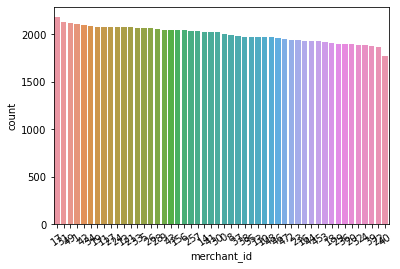

In [86]:
df3=df["merchant_id"].value_counts().to_frame().reset_index()
df3.columns=["merchant_id","count"]
plt.figure(2)
sns.barplot(df3['merchant_id'],df3["count"])
plt.xticks(rotation=35)
plt.show()

### Findings:
### 1. highest number of order during 11-12 th hour and 18th-19th hour of the day
### 2. In the given data, highest no. of order in Sep and October

In [75]:
list(df)

['booking_time',
 'booking_distance',
 'booking_amount',
 'actual_total_time',
 'payment_method_name',
 'item_total_cnt',
 'item_unique_cnt',
 'customer_id',
 'merchant_id',
 'book_DOW',
 'book_m',
 'book_hr']

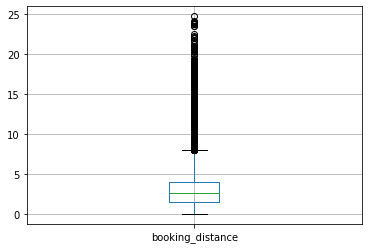

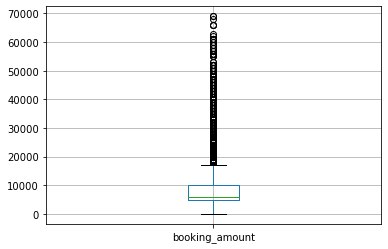

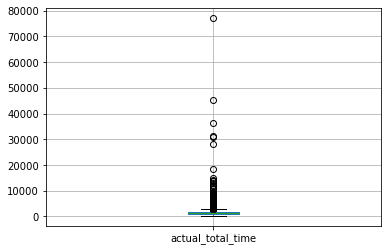

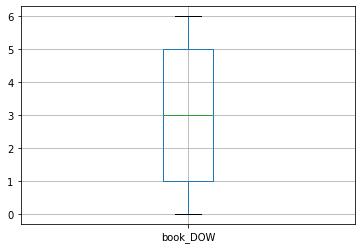

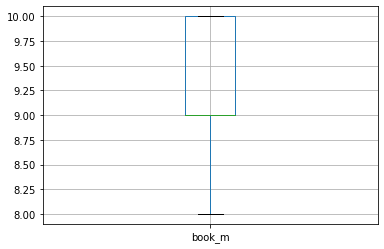

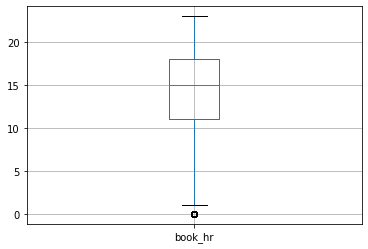

In [77]:
Numerical_column=[
 'booking_distance',
 'booking_amount',
 'actual_total_time',
 'book_DOW',
 'book_m',
 'book_hr']
for i in (Numerical_column):
    boxplt = df.boxplot(column=[i])
    plt.show()

## checking multicollienarity

In [79]:
df.corr()

,booking_distance,booking_amount,actual_total_time,item_total_cnt,item_unique_cnt,customer_id,merchant_id,book_DOW,book_m,book_hr
booking_distance,1.000000,0.580402,0.437126,0.091017,0.084464,-0.003842,-0.000922,0.016938,-0.011836,-0.041447
booking_amount,0.580402,1.000000,0.256914,0.054689,0.026133,-0.004139,-0.000452,0.009499,-0.027283,-0.022045
actual_total_time,0.437126,0.256914,1.000000,0.147778,0.167082,0.000966,0.004306,0.040144,0.010339,0.035139
item_total_cnt,0.091017,0.054689,0.147778,1.000000,0.635175,0.002358,0.000253,0.022093,0.004847,-0.063242
item_unique_cnt,0.084464,0.026133,0.167082,0.635175,1.000000,0.001541,-0.002749,0.022674,0.002220,-0.043073
customer_id,-0.003842,-0.004139,0.000966,0.002358,0.001541,1.000000,-0.000066,0.000335,0.006890,0.006127
merchant_id,-0.000922,-0.000452,0.004306,0.000253,-0.002749,-0.000066,1.000000,0.003024,0.003462,0.001087
book_DOW,0.016938,0.009499,0.040144,0.022093,0.022674,0.000335,0.003024,1.000000,0.092280,-0.010822
book_m,-0.011836,-0.027283,0.010339,0.004847,0.002220,0.006890,0.003462,0.092280,1.000000,-0.004784
book_hr,-0.041447,-0.022045,0.035139,-0.063242,-0.043073,0.006127,0.001087,-0.010822,-0.004784,1.000000


In [99]:
df['customer_id']=df['customer_id'].astype(str)
df['merchant_id']=df['merchant_id'].astype(str)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   booking_time         100000 non-null  datetime64[ns]
 1   booking_distance     100000 non-null  float64       
 2   booking_amount       100000 non-null  int64         
 3   actual_total_time    100000 non-null  int64         
 4   payment_method_name  100000 non-null  object        
 5   item_total_cnt       100000 non-null  int64         
 6   item_unique_cnt      100000 non-null  int64         
 7   customer_id          100000 non-null  object        
 8   merchant_id          100000 non-null  object        
 9   book_DOW             100000 non-null  int64         
 10  book_m               100000 non-null  int64         
 11  book_hr              100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 9.2+ 

In [82]:
df.corr()

,booking_distance,booking_amount,actual_total_time,item_total_cnt,item_unique_cnt,book_DOW,book_m,book_hr
booking_distance,1.000000,0.580402,0.437126,0.091017,0.084464,0.016938,-0.011836,-0.041447
booking_amount,0.580402,1.000000,0.256914,0.054689,0.026133,0.009499,-0.027283,-0.022045
actual_total_time,0.437126,0.256914,1.000000,0.147778,0.167082,0.040144,0.010339,0.035139
item_total_cnt,0.091017,0.054689,0.147778,1.000000,0.635175,0.022093,0.004847,-0.063242
item_unique_cnt,0.084464,0.026133,0.167082,0.635175,1.000000,0.022674,0.002220,-0.043073
book_DOW,0.016938,0.009499,0.040144,0.022093,0.022674,1.000000,0.092280,-0.010822
book_m,-0.011836,-0.027283,0.010339,0.004847,0.002220,0.092280,1.000000,-0.004784
book_hr,-0.041447,-0.022045,0.035139,-0.063242,-0.043073,-0.010822,-0.004784,1.000000


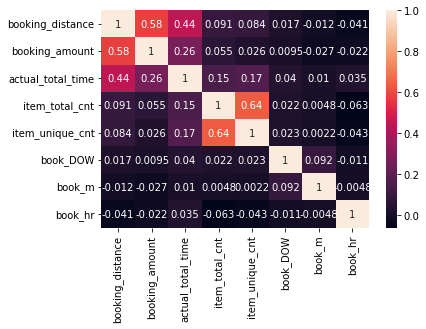

In [85]:
corr1=df.corr()
corr=sns.heatmap(corr1, annot=True)

## Finding: variables are not correlated

## Merchant id,Payment method and Customer id does not play any role in prediction so we will drop them from  data

In [116]:
#independent and dependent features
df_new=df.copy()
df_new.drop(['customer_id','customer_id','payment_method_name','booking_time'],axis=1,inplace=True)
x=df_new.drop(['actual_total_time'],axis=1)
y=df_new['actual_total_time']


In [113]:
y

0        1551
1        2086
2        1760
3        1235
4        1604
         ... 
99995     784
99996    1908
99997    1472
99998    2634
99999     764
Name: actual_total_time, Length: 100000, dtype: int64

## Linear Regression

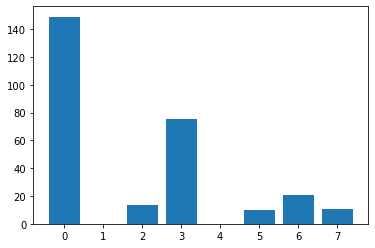

In [118]:
#Data partitioning into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40,random_state=109) 
model=LinearRegression().fit(X_train,y_train)
# get importance
importance = model.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [119]:
importance

array([1.48892299e+02, 2.03606560e-03, 1.32408169e+01, 7.52111911e+01,
       8.50842399e-02, 1.02328308e+01, 2.06793099e+01, 1.07673467e+01])

In [121]:
out_forecast = model.predict(X_test)
in_forecast = model.predict(X_train)

In [122]:
out_forecast

array([1229.35190816, 1911.18511141, 1709.04083131, ..., 2259.33288034,
       1625.72846281, 2882.49731023])

In [123]:
in_forecast

array([1468.2880321 , 1892.60313153, 3366.43880924, ..., 1761.11505038,
       1780.97002287, 1003.46358258])

In [124]:
def mae(actual,forecast):
    result = 0 
    for a,f in zip(actual,forecast):
        result += abs(a-f)
    return result/len(forecast)

def mape(actual, forecast): 
    result = 0 
    for a,f in zip(actual,forecast):
            result += abs(a-f)/a
    return result/len(forecast)
    
def rmse(actual, forecast): 
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    return rmse

def run_error_result(actual,forecast,name):
    def mae(actual,forecast):
        result = 0 
        for a,f in zip(actual,forecast):
            result += abs(a-f)
        return result/len(forecast)

    def mape(actual, forecast): 
        result = 0 
        for a,f in zip(actual,forecast):
                result += abs(a-f)/a
        return result/len(forecast)
    
    def rmse(actual, forecast): 
        rmse = np.sqrt(mean_squared_error(actual, forecast))
        return rmse
    
    return pd.DataFrame({'MAE':[mae(actual, forecast)],'MAPE': [mape(actual,forecast)],'RMSE': [rmse(actual,forecast)]},index=pd.Series([name]))

In [125]:
print(run_error_result(y_test, out_forecast,'Out-sample'))
print(run_error_result(y_train, in_forecast,'In-sample'))

                   MAE      MAPE       RMSE
Out-sample  446.508981  0.333839  789.79913
                  MAE      MAPE        RMSE
In-sample  441.018645  0.332048  620.745705


## Random Forest

In [129]:
#Data partitioning into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=109)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [130]:
print(rf.feature_importances_)

[0.40649994 0.09670149 0.0568838  0.0387457  0.16354785 0.092909
 0.02826447 0.11644774]


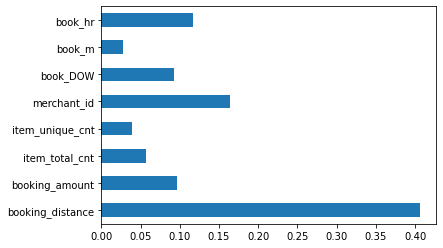

In [132]:
f_imp=pd.Series(rf.feature_importances_,index=x.columns)
f_imp.plot(kind='barh')
plt.show()

In [133]:
## predict test set  (out-sample)
out_forecast = rf.predict(X_test)
## predict train set  (in-sample)
in_forecast = rf.predict(X_train)
print(run_error_result(y_test, out_forecast,'Out-sample'))
print(run_error_result(y_train, in_forecast,'In-sample'))

                   MAE      MAPE        RMSE
Out-sample  468.557516  0.353448  823.978803
                  MAE      MAPE        RMSE
In-sample  172.008875  0.130618  248.959725


## Random forest gives least error in-sampl so going with it

In [134]:
X_test['pred_delivery_time'] = rf.predict(X_test)
X_train['pred_delivery_time'] = rf.predict(X_train)

In [136]:
X_train

,booking_distance,booking_amount,item_total_cnt,item_unique_cnt,merchant_id,book_DOW,book_m,book_hr,pred_delivery_time
40514,0.69,10000,1,1,19,4,10,13,900.05
39697,0.92,6000,1,1,11,5,10,11,730.96
33954,5.99,5000,3,3,22,2,10,8,1877.41
14833,1.70,12000,7,3,0,0,9,16,1435.64
59219,2.64,6000,3,2,41,1,9,19,1162.95
...,...,...,...,...,...,...,...,...,...
16368,1.69,6000,1,1,3,0,10,14,1492.61
82061,1.33,6000,5,4,5,4,9,14,1350.30
7925,0.73,9000,15,8,7,3,10,10,1096.20
19701,4.06,7000,6,3,37,6,9,11,1789.37


In [140]:
a = pd.DataFrame(y_test)
a.columns = ['actual_delivery_time']
b = pd.DataFrame(y_train)
b.columns = ['actual_delivery_time']
test_result = X_test.join(a)
train_result = X_train.join(b)

In [141]:
test_result

,booking_distance,booking_amount,item_total_cnt,item_unique_cnt,merchant_id,book_DOW,book_m,book_hr,pred_delivery_time,actual_delivery_time
46903,0.89,10000,2,2,17,4,9,17,1214.320000,802
17052,5.64,11000,2,2,49,0,9,18,2138.256667,2470
30055,4.84,15000,1,1,17,0,9,18,1610.090000,2872
32486,1.83,0,2,1,48,1,10,16,1385.650000,768
39622,6.59,4000,2,1,23,1,9,18,1868.080000,1770
...,...,...,...,...,...,...,...,...,...,...
88551,3.20,0,2,1,17,1,10,18,1461.410000,1575
73185,1.02,12000,3,3,0,0,10,18,1905.510000,1601
93604,3.01,10000,5,3,19,4,10,19,1791.280000,1975
40538,4.58,0,7,3,27,3,10,14,1841.940000,2114


In [142]:
train_result

,booking_distance,booking_amount,item_total_cnt,item_unique_cnt,merchant_id,book_DOW,book_m,book_hr,pred_delivery_time,actual_delivery_time
40514,0.69,10000,1,1,19,4,10,13,900.05,811
39697,0.92,6000,1,1,11,5,10,11,730.96,497
33954,5.99,5000,3,3,22,2,10,8,1877.41,2043
14833,1.70,12000,7,3,0,0,9,16,1435.64,1341
59219,2.64,6000,3,2,41,1,9,19,1162.95,1034
...,...,...,...,...,...,...,...,...,...,...
16368,1.69,6000,1,1,3,0,10,14,1492.61,1677
82061,1.33,6000,5,4,5,4,9,14,1350.30,1173
7925,0.73,9000,15,8,7,3,10,10,1096.20,950
19701,4.06,7000,6,3,37,6,9,11,1789.37,1886


In [143]:
pwd

'C:\\Users\\admin'